## Neural Networks By Hand: Analysis and Exploration

##### Authors: Jessica Khaskheli


##### Collaborators: None


##### Date: April 29, 2022

## Perceptrons by Hand

##### Problem Description: 
I want to understand how perceptrons function by plotting the OR, AND and XOR functions by hand, implementing Rosenblatt's algorithm by hand and then using the MLPRegressor and other packages to evaluate how different sized neural networks perform on classifying data.

## 1: OR Function

I started with a guess of weight values in order to graph my line of separation. I chose weight values, plugged them into the equation: w0 + w1*X1 + w2*X2 and compared the output to the y values each row is associated with to make sure the output fired when it was supposed to and didn't fire when it wasn't supposed to. I plotted the 4 points and indicated which point was in a different class with the color red. The weights I chose were:
- w1 = 1
- w2 = 1
- w0 = 1/2

These weights satisfied the output values (y) because they produced numbers that were all positive besides for the X1, X2 pairs (0,0).

In [ ]:
# insert image of calculations

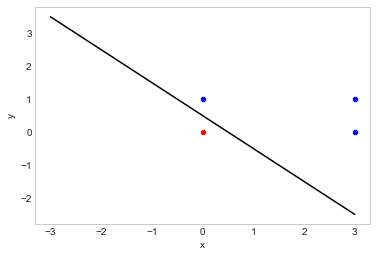

In [747]:
# Plot for OR function, line of separation and 4 points
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3,3,100)
y = -x+(1/2) # equation given from the weight guesses
plt.plot(x, y, '-k')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.scatter(3, 1, color = 'blue', s = 20)
plt.scatter(0, 1, color = 'blue', s = 20)
plt.scatter(3, 0, color = 'blue', s = 20)
plt.scatter(0,0, color = 'red', s = 20)
plt.grid()
plt.show()

## 2: Weight Bounds

#### Given the same inputs/outputs from part 1, what are the bounds on w 1and w2?

The equation for the line of separation is given by: X2 = (-w1/w2)*X1 + (-w0/w2) which is what I used to test the range of weights that would separate the two classes for the OR Function. The bounds that I found for the OR function were:

- w1 > 1/6
- w2 > 1/2

## 3: AND Function

## Rewriting with correct weights
I started with a guess of weight values in order to graph my line of separation. I chose weight values, plugged them into the equation: w0 + w1*X1 + w2*X2 and compared the output to the y values each row is associated with to make sure the output fired when it was supposed to and didn't fire when it wasn't supposed to. I plotted the 4 points and indicated which point was in a different class with the color red. The weights I chose were:
- w1 = 1
- w2 = 1
- w0 = 1/2

These weights satisfied the output values (y) because they produced numbers that were all positive besides for the X1, X2 pairs (0,0).

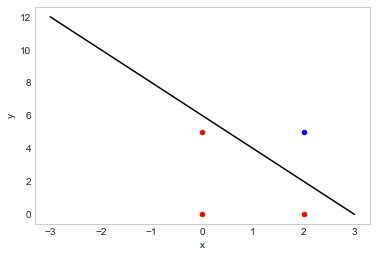

In [750]:
# plot for AND function, line of separation and four points
x = np.linspace(-3,3,100)
y = -2*x +6
plt.plot(x, y, '-k')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.scatter(2, 5, color = 'blue', s = 20)
plt.scatter(2, 0, color = 'red', s = 20)
plt.scatter(0, 5, color = 'red', s = 20)
plt.scatter(0,0, color = 'red', s = 20)
plt.grid()
plt.show()

## 4: Weight Bounds
#### Given the same inputs/outputs from part 1, what are the bounds on w1 and w2?
The equation for the line of separation is given by: X2 = (-w1/w2)*X1 + (-w0/w2). This is the same equation I used to plug my weights into and graph for the plot above. From this equation, I can deduce the following bounds for w1 and w2:

- 3/2 > w1 > 1/4

- 3/5 > w2 > 1/3

I was able to figure out the bounds by changing the values of w1 and w2 and looking at how these values shifted the line around. w1 and w2 both control the slope of the line and w2 also controls where the y-intercept occurs. I didn't use equality symbols that included (=), like greater than or equal to because if the weights are equal to the bounds I provided, the line ends up sitting right at one of the points which doesn't separate the points and causes a discontinuity. I just included less than or greater than equality statements to show that as long as the weights are not equal to those bounds, they can separate the two classes by taking on any weight value in between the two bounds.

## 5: XOR Function

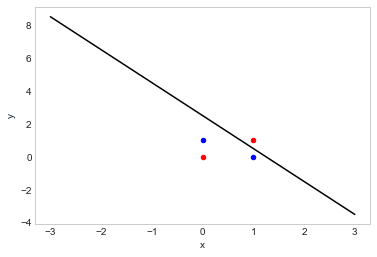

In [764]:
x = np.linspace(-3,3,100)
y = -2*x +2.5 # guess for one of the lines
plt.plot(x, y, '-k')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.scatter(1, 1, color = 'red', s = 20)
plt.scatter(1, 0, color = 'blue', s = 20)
plt.scatter(0, 1, color = 'blue', s = 20)
plt.scatter(0,0, color = 'red', s = 20)
plt.grid()
plt.show()

## Comments:
- For the XOR Function, it seems like the weights w5 and w6 would be used to create a more complex function, potentially a non-linear function, to separate the two classes. Another way we can separater the two classes it by finding two different lines of separation.

#### 

## Implementing Rosenblatt's Algorithm

##### Plan:
I will implement Rosenblatt's Algorithm from scratch. I will be using the Boston housing data set, and will create boolean indicators for houses valued above and below $40k and plot them against the number of rooms in the house. I will attempt to separate the two clusters using Rosenblatt's Algorithm.

In [1121]:
# reading in packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.datasets import load_boston
import pandas as pd

## 6

In [1003]:
# suppressing warnings from being printed
import warnings
warnings.filterwarnings('ignore')

boston_data = load_boston()
print(boston_data.keys()) # looking to see what attributes are included in load_boston

boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names) # creating pd df, MEDV label not included

boston_df # printing df

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [1008]:
# checking for NA entries
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

In [1009]:
# creating boolean indicator for MEDV values that are above 40k
medv1 = boston_data.target

medv = np.where(medv1 > 40, 1, 0)

In [1010]:
# making sure code worked and updated with boolean values
pd.DataFrame(medv).value_counts()

0    475
1     31
dtype: int64

In [1011]:
# adding MEDV to boston df

boston_df['highPriced'] = medv
boston_df['medv'] = medv1

In [1012]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,highPriced,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,0,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,0,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,0,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,0,22.0


In [1004]:
# making sure highpriced was added as a column
# print(boston_df)

[Text(0.5, 1.0, 'Plot of Room # vs Home prices above and below 40k')]

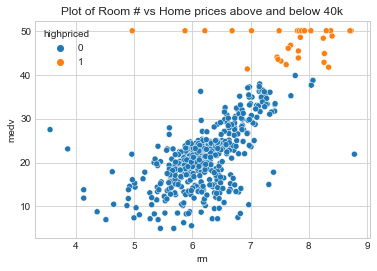

In [1014]:
import seaborn as sb

# converting all column names to lowercase
boston_df.columns = boston_df.columns.str.lower()

# plotting medv and rm to share linear separable relationship

l_s = sb.scatterplot(x = 'rm', y = 'medv', data = boston_df, hue = 'highpriced').set(title='Plot of Room # vs Home prices above and below 40k')
l_s

##### Comments:

It's clear that data is linearly separable in the plot above. I set the color of the points to be different depending on if the variable 'highpriced' takes on a value of 0 or 1 to make it more clear. We can see that the two classes can be separated around the (7.5, 40) coordinate point area and we can see a large cluster of houses priced lowers than $40k at the bottom of the graph and a much smaller number of high priced homes in the top right corner. There are infinite possibilities for where the line is placed in between the space seaparating two classes.

## 7

In [8]:
X = boston_df[['rm', 'medv']]
Y = boston_df['highpriced']
print("Dimensions of X input matrix:", X.shape)
print("Dimensions of Y output vector:", Y.shape)

Dimensions of X input matrix: (506, 2)
Dimensions of Y output vector: (506,)


## 8

In [1042]:
# supressing warning message from being printed
warnings.filterwarnings('ignore')

# creating a column of zeroes
X['bias'] = 0
# displaying first 5 rows of X
X[:5]

,rm,medv,bias
0,6.575,24.0,0
1,6.421,21.6,0
2,7.185,34.7,0
3,6.998,33.4,0
4,7.147,36.2,0


## 9

In [1103]:
step = 0.01 # defining small learning rate
weights = np.random.rand(X.shape[1]) # initializing a set of random weights


print("step size:", step)
print("weights:", weights)

step size: 0.01
weights: [0.16758881 0.79386077]


## 10

**Creating a function that takes in X, Y, step size and vector of weights and outputs the updated weights and the number of misclassifications**

In [1087]:
def myPerceptron(X_features, Y_labels, step, weights):
    X = np.array(X_features)
    Y = np.array(Y_labels)
    weights=np.random.rand(X.shape[1])
    missclassification = []
    original_weights = weights # to calculate difference in weights later
    bias = 0
    for i in range(0, 1): # doing one iteration
        activation = activation_function(np.matmul(np.transpose(weights), X[i]))     
        y_label=0
        if activation >= 0.4:  # deciding whether to fire or not
            y_label = 1
        elif activation <= (-0.4):
            y_label=-1
        weights = weights + step*(y_label-Y[i])*X[i] # updating weights
        if Y[i] == y_label:
            missclassified = np.where(Y[i] != y_label) # displaying misclassified values
            missclassification = missclassification.append(missclassified)
            print(y_label)
    print('difference in weights: '+str(weights-original_weights))
    print('iteration number '+str(i)+': '+str(weights))
    print(missclassification)

In [1088]:
# using step function as activation function
def activation_function(value):
    return np.heaviside(value,1)

In [1089]:
# printing out one iteration of weights
X = boston_df[['rm', 'medv']]
Y = boston_df['highpriced']

myPerceptron(X, Y, step, weights)

difference in weights: [0.06575 0.24   ]
iteration number 0: [0.39646367 0.76320478]
[]


##### Comments:
I added an initialized array that I could update with misclassified labels but I wasn't able to get them to print. And I also feel like the weights I generated don't take on values that would split the two classes apart accurately because I know that my two classes are aligned horizontally and the line I would need would have a slope as close to zero as possible. The weights that control the slope in this case aren't super close to zero.

## 11

**Re-pasting my function but now to include more iterations so it can converge**

In [1104]:
def myPerceptron(X_features, Y_labels, step, weights):
    X = np.array(X_features)
    Y = np.array(Y_labels)
    weights=np.random.rand(X.shape[1])
    missclassification = []
    original_weights = weights # to calculate difference in weights later
    bias = 0
    for i in range(X.shape[0]): # doing one iteration
        activation = activation_function(np.matmul(np.transpose(weights), X[i]))     
        y_label=0
        if activation >= 0.4:  # deciding whether to fire or not
            y_label = 1
        elif activation <= (-0.4):
            y_label=-1
        weights = weights + step*(y_label-Y[i])*X[i] # updating weights
        #if Y[i] == y_label:
            #missclassified = np.where(Y[i] != y_label) # displaying misclassified values
            #missclassification = missclassification.append(missclassified)
            #print(y_label)
    print('difference in weights: '+str(weights-original_weights))
    print('iteration number '+str(i)+': '+str(weights))
    return weights

In [1105]:
myPerceptron(X, Y, step, weights)

difference in weights: [29.42953 99.306  ]
iteration number 505: [ 30.06768328 100.16741099]


array([ 30.06768328, 100.16741099])

##### Comments:

- My function took 505 iterations to converge with a step size set to 0.01. One problem I see with my approach is that the number of iterations don't change when I change the value of my step size however, the value of my weights do get much larger as I try larger values for my step size.
- I think stochastic gradient descent would generate a plot of errors similar to the perceptron function because the work similarly. Gradient descent updates the size of the weights one by one for missclassification so I would expect the error vs. epoch plot to look similar.
- I didn't plot my errors vs. iterations but if I were to, I would expect the shape to be like an exponential curve because the guesses for the weights done in the first few iterations would have a larger error than the guesses for the weights once you near convergence.

## 12

<AxesSubplot:xlabel='rm', ylabel='medv'>

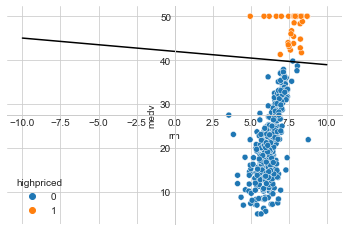

In [1094]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# defining x and y equations
x = np.linspace(-10,10,100)
y = -(30/99)*x + 42

# 0.4463/1.5

# plotting line and points
plt.plot(x, y, '-k')

sb.scatterplot(x = 'rm', y = 'medv', data = boston_df, hue = 'highpriced')


##### Comments:
The weights that I gathered were about 30 and 99 which control the slope of the line. In the description of part 12, it states that w0X0 is a constant, and from that I chose that number to be anything I wanted in order to separate the two classes accurately. However, I do know that w2 also plays a part in defining the y-intercept of the line but that value is still a constant. I chose the constant to be 42 because that's the value that separates the two classes the best visually given the value I generate for the slope from myPerceptron. I wonder if I could've generate an accurate value for my y-intercept from myPerceptron without doing a guess and check. And I do see a flaw in this as this model should generate the right intercept for the line to separate the two classes. Regardless, the slope that I was able to generate was able to fit well between the two classes but I can see that there could be a range of values that can be taken on for the slope and either choice would separate the two classes well too. For reference, I took the slope to be -w1/w2 like it's shown in the linear equation: (-w1/w2)*X1 + (-w0/w2)

##### Neural Network Implementation

##### Plan:
I plan to implement multiple neural network models with 2, 5, 10, 20, and 50 neurons to evaulate their performance on classifying the data. I will be using the Boston housing data set. It's important to note that some of the language used in this data set is problematic and outdated due to how old this dataset is which poses an ethical concern. I will just be using this dataset as a tool to better understand how neural networks function.

## 13

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
boston_full = boston_df.drop("highpriced", axis = 1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
# defining features and labels
features = boston_full.drop("medv", axis = 1)
labels = boston_full["medv"]

# creating my train and test split with 20% data dedicated to the test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

In [25]:
# printing our shape of training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of y_train: (404,)
Shape of X_test: (102, 13)
Shape of y_test: (102,)


## 14

In [91]:
# training neural network with single hidden layer
single_layer2 = MLPRegressor(hidden_layer_sizes = (2,), max_iter = 1000).fit(X_train, y_train)
single_layer5 = MLPRegressor(hidden_layer_sizes = (5,), max_iter = 1000).fit(X_train, y_train)
single_layer10 = MLPRegressor(hidden_layer_sizes = (10,), max_iter = 1000).fit(X_train, y_train)
single_layer20 = MLPRegressor(hidden_layer_sizes = (20,), max_iter = 1000).fit(X_train, y_train)
single_layer50 = MLPRegressor(hidden_layer_sizes = (50,), max_iter = 1000).fit(X_train, y_train)

In [92]:
# predictions for single layer with varying sizes
single_layer_pred2 = single_layer2.predict(X_test)
single_layer_pred5 = single_layer5.predict(X_test)
single_layer_pred10 = single_layer10.predict(X_test)
single_layer_pred20 = single_layer20.predict(X_test)
single_layer_pred50 = single_layer50.predict(X_test)

In [93]:
# printing all R2 scores for training and test sets with different hidden layer sizes

print("R^2 for Training set with size 2:", single_layer2.score(X_train, y_train))
print("R^2 for Test set with size 2:", single_layer2.score(X_test, y_test))

print("R^2 for Training set with size 5:", single_layer5.score(X_train, y_train))
print("R^2 for Test set with size 5:", single_layer5.score(X_test, y_test))

print("R^2 for Training set with size 10:", single_layer10.score(X_train, y_train))
print("R^2 for Test set with size 10:", single_layer10.score(X_test, y_test))

print("R^2 for Training set with size 20:", single_layer20.score(X_train, y_train))
print("R^2 for Test set with size 20:", single_layer20.score(X_test, y_test))

print("R^2 for Training set with size 50:", single_layer50.score(X_train, y_train))
print("R^2 for Test set with size 50:", single_layer50.score(X_test, y_test))

R^2 for Training set with size 2: 0.10206300906486288
R^2 for Test set with size 2: 0.005765194169146892
R^2 for Training set with size 5: 0.5088338064412312
R^2 for Test set with size 5: 0.3418263883280497
R^2 for Training set with size 10: 0.4191480002647705
R^2 for Test set with size 10: 0.2182025259595345
R^2 for Training set with size 20: 0.39952223135021836
R^2 for Test set with size 20: 0.2127203217578989
R^2 for Training set with size 50: 0.4693625473937263
R^2 for Test set with size 50: 0.19391499924103806


##### Comments:

**How well does each neural network perform when predicting values for the training dataset?**

- With keeping all of the hyperparameters as defaults besides max_iter and and the hidden layer sizes, I found that this neural network doesn't perform very well when predicting values for both the training and test sets for most of the hidden_layer_size values. I applied the score() function to both the training and test sets, which gave me the R2 values for both sets. R2 by defintion is the residual sum of squares divided by the total sum of squares. The sum of squares refers to the difference because the true and predicted values and since I'm using MLPRegressor, using the score() function works best instead of using the accuracy_score() function from sklearn.metrics. For the training set with hidden_layer_size set to 5, I found an R^2 value of 0.508 which was the highest value amongst all of the R^2 scores for the training sets. I set a baseline that the R^2 value should be over 50% to conclude that the model predicted the values for the training and test sets "well" because an R2 value of 50% is equivalent to saying the model predicted the true values at random. In the case of a hidden layer size of 5, the model barely predicted the training set values well. Additionally, the neural networks with hidden layer sizes 2, 10, 20 and 50 all had training set R^2 scores ranging from 0.1 to 0.4, which is considered low. For a hidden layer size of 2, the training set R^2 score was 0.102 which means only 10% of the variability in median home value can be explained by the number of rooms per home. 

**How well does each neural network perform when predicting values for the test dataset?**

- The same interpretation can be applied to the other R^2 scores for both the training and test sets, where I can conclude that less than 50% of the variability in the median home value is explained by the number of rooms in a home.

## 15

##### Plan:
I plan to implement multiple neural network models with two hidden layer sizes with 2, 5, 10, 20, and 50 neurons to evaulate their performance on classifying the data. 

In [95]:
two_layers = MLPRegressor(hidden_layer_sizes = (2,2,), max_iter = 1000).fit(X_train, y_train)
five_layers = MLPRegressor(hidden_layer_sizes = (5,5,), max_iter = 1000).fit(X_train, y_train)
ten_layers = MLPRegressor(hidden_layer_sizes = (10,10,), max_iter = 1000).fit(X_train, y_train)
twenty_layers = MLPRegressor(hidden_layer_sizes = (20,20,), max_iter = 1000).fit(X_train, y_train)
fifty_layers = MLPRegressor(hidden_layer_sizes = (50,50,), max_iter = 1000).fit(X_train, y_train)

In [96]:
# predictions for two layers with varying sizes
two_layer_pred = two_layers.predict(X_test)
five_layer_pred = five_layers.predict(X_test)
ten_layer_pred = ten_layers.predict(X_test)
twenty_layer_pred = twenty_layers.predict(X_test)
fifty_layer_pred = fifty_layers.predict(X_test)

In [97]:
# printing all R2 scores for training and test sets for 2 hidden layers with various sizes

print("R^2 for Training set with size 2:", two_layers.score(X_train, y_train))
print("R^2 for Test set with size 2:", two_layers.score(X_test, y_test))

print("R^2 for Training set with size 5:", five_layers.score(X_train, y_train))
print("R^2 for Test set with size 5:", five_layers.score(X_test, y_test))

print("R^2 for Training set with size 10:", ten_layers.score(X_train, y_train))
print("R^2 for Test set with size 10:", ten_layers.score(X_test, y_test))

print("R^2 for Training set with size 20:", twenty_layers.score(X_train, y_train))
print("R^2 for Test set with size 20:", twenty_layers.score(X_test, y_test))

print("R^2 for Training set with size 50:", fifty_layers.score(X_train, y_train))
print("R^2 for Test set with size 50:", fifty_layers.score(X_test, y_test))

R^2 for Training set with size 2: 0.12404892482911345
R^2 for Test set with size 2: -0.18657188479955145
R^2 for Training set with size 5: 0.4126249760365793
R^2 for Test set with size 5: 0.3825522060680051
R^2 for Training set with size 10: 0.4153781807690987
R^2 for Test set with size 10: 0.2344707087311041
R^2 for Training set with size 20: 0.46136170784536945
R^2 for Test set with size 20: 0.41741713511846856
R^2 for Training set with size 50: 0.2925107136978389
R^2 for Test set with size 50: 0.18444920467278525


In [403]:
# creating df of y_test and prediction vectors so I can plot them easier
error_rates = pd.DataFrame()
error_rates['y_test'] = y_test
error_rates['two_layer_pred'] = two_layer_pred
error_rates['five_layer_pred'] = five_layer_pred
error_rates['ten_layer_pred'] = ten_layer_pred
error_rates['twenty_layer_pred'] = twenty_layer_pred
error_rates['fifty_layer_pred'] = fifty_layer_pred

In [406]:
# only selecting head of df because there's too many rows to make a coherent plot
error_rates = error_rates[:10]

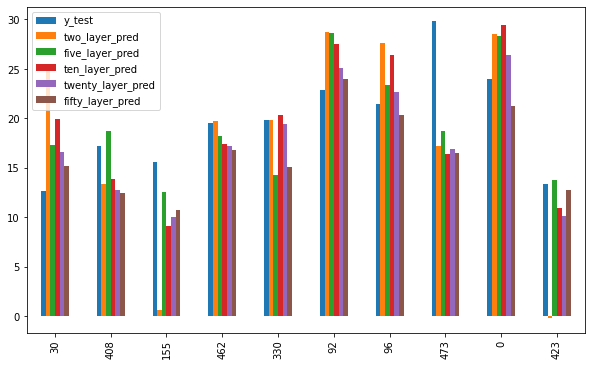

In [407]:
# plotting a small set of y_test and predictions to compare values
import matplotlib.pyplot as plt
error_rates.plot(kind='bar',figsize=(10,6))
plt.show()

In [381]:
print(mean_absolute_error(y_test, two_layer_pred))
print(mean_absolute_error(y_test, five_layer_pred))
print(mean_absolute_error(y_test, ten_layer_pred))
print(mean_absolute_error(y_test, twenty_layer_pred))
print(mean_absolute_error(y_test, fifty_layer_pred))

6.58273313869129
4.227810393293476
5.0915566673020995
3.9673742104286105
4.473678175498622


##### Comments:
**Evaluation of each Neural Network's performance when predicting values for training dataset:**

- For the training sets, neural networks with hidden layer sizes 5, 10 and 20 performed the best, averaging at about 40% for the R^2 score while neural networks with hidden layer sizes 2 and 50 produced R^2 score values of 10% and 30% respectively. I would say that even an R^2 score of about 40% doesn't constitute a "well" performing neural network but within these 5 choices for hidden layer sizes, the 5, 10 and 20 performed the best out of them.

**Evaluation of each Neural Network's performance when predicting values for test dataset:**

- For the test sets, the R^2 scores were lower than the training set R^2 scores which is expected. The hidden layer sizes that caused the highest R^2 scores for the test sets were 5 and 20 with R^2 scores of about 38% and 43% respectively. I converted the R^2 scores into percentages when presenting them to gain a better idea of what percent of the variability in median home value is accounted for by the number of rooms in a home. I plotted my 'y_test' vector and the prediction vectors for each set of hidden layer sizes and found that most of the time, the prediction values were overshooting the true value. In other words, most of the bars are larger than the 'y_test' bar in the plot. However, I only plotted a handful of points because plotting the entire set (102 points) would make it difficult to see the difference in values.

- After calculating the mean absolute error, I found that a hidden layer size set to 20 produced the smallest amount of error out of all of the other hidden layer size choices. Ths mean absolute error for size = 20 is about 3.96 while the mean absolute error for size = 2 is about 6.58 for comparison.

## 17 Best Neural Network Architecture

##### Plan: 
After training muliple neural network models on the data, I plan to design the best architecture for a neural network without changing any parameters besides the hidden layer sizes and the number of maximum iterations.

In [1113]:
best_layer = MLPRegressor(hidden_layer_sizes = (35,), max_iter = 850).fit(X_train, y_train)

In [1114]:
best_layer_pred = best_layer.predict(X_test)

In [1115]:
best_layer.score(X_train, y_train)

0.5591980000021988

In [1116]:
mean_absolute_error(y_test, best_layer_pred)

4.740871390191084

In [1117]:
best_layer_df = pd.DataFrame()
best_layer_df['y_test'] = y_test
best_layer_df['best_layer_pred'] = best_layer_pred

In [1118]:
best_layer_df = best_layer_df[:30]

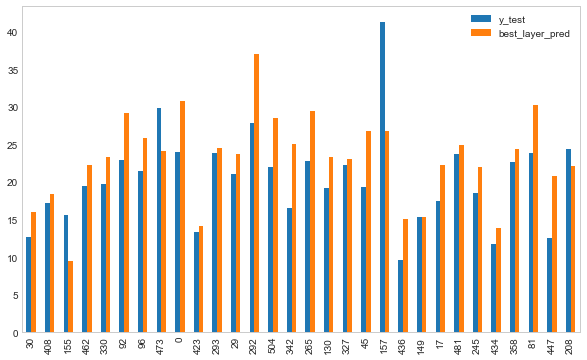

In [1120]:
best_layer_df.plot(kind='bar',figsize=(10,6), grid = False)
plt.show()

In [383]:
print("Mean Absolute Error for best performing neural network:", mean_absolute_error(y_test, best_layer_pred))

Mean Absolute Error for best performing neural network: 3.625320870814309


In [1111]:
# initializing arrays for training and test scores so that I can look at how consistent the scores are
score_train = []
score_test = []

# iterating through neural network 10 times
for i in range(0, 10):
    single_layer = MLPRegressor(hidden_layer_sizes= (35,), max_iter = 850).fit(X_train, y_train)
    single_layer_pred = single_layer.predict(X_test)
    score_train = np.append(score_train, single_layer.score(X_train, y_train))
    score_test = np.append(score_test, single_layer.score(X_test, y_test))
print("Training set R2 scores:", score_train)
print("Test set R2 scores:", score_test)

Training set R2 scores: [0.62858724 0.52162383 0.41198808 0.56239564 0.49456802 0.3536465
 0.54546166 0.51191252 0.6181852  0.37852888]
Test set R2 scores: [0.57385549 0.32453918 0.29094728 0.43597195 0.35889596 0.01746217
 0.38520914 0.38470363 0.5358315  0.07505757]


##### Comments:
**Design for best neural network architecture:**

- From looking at the difference between 'y_test' and the predicted values for different hidden layer sizes, I found that since the mean absolute error was the smallest for size = 20, I would start there when designing the best architecture for my neural network. On its own, with one hidden layer and its size being 20, I found that the R^2 score was 0.51. I added a third hidden layer with all of them being size = 20 and found that this increased my R^2 score to 0.40 which is larger than when I had two hidden layers but smaller than when I had one hidden layer. I played around with the sizing of the three hidden layers and tried inputting larger values for the first layer and gradually decreasing the size of the layer for the second and third layers. I did this because we learned that starting out with a larger number of neurons in the first hidden layer adds more abstractions and creates more complex feature detectors. Similarly with the spiral datasts classification problem we did in class, we found that having a more dense first layer allowed for the classification of the spiral to be more precise. Eventually, after trying many options for the size of the three hidden layers and the maximum iteration values, I found that having one hidden layer of size 30-35 with a maximum iteration value of 850 worked to give me a R^2 score of about 0.62, however, the scores varied between 0.5-0.6 for this set of hyperparameters. Although the R^2 scores still do vary, the range is constrained to 0.5-0.6 like I stated before, while when I tried other sets of hyperparamters, the range of values that R^2 took on for 10 iterations was a lot wider. This is one of the factors that justifies why I think my one hidden layer with size 35 and max_iter set to 850 is the best I can do. In addition, a score of 0.62 would mean that 62% of the variability in median home value can be explained by the number of rooms per home which would mean that it's likely the correlation between them is not due to random chance.

- I plotted side-by-side barplots of my 'y_test' vector and my vectors of predictions from the best neural network I could design and found that the bars representing the prediction values were a lot closer together (visually) to the 'y_test' values than I observed when I plotted the prediction values in part 16. The prediction outputs for this neural network design seem to take on more consistent values than the neural network designs in  part 16 and  part 15. What I mean by this is that, it seems like the prediction values are either a little larger or a little smaller than my 'y_test' values in my plot above and I can observe a more consistent pattern for what values they take on. As opposed to my plot for part 16 of the many hidden layer sizes, when comparing the prediction values for the hidden layer size of 2 for instance, the prediction value would either shoot up a lot higher than the 'y_test' value or be considerably smaller than the 'y_test' value; although there were some instances like at x = 462, where 'y_test' and 'two_layer_pred' (hidden layers with size 2) were close in value. Looking at my plot for part 17, I can justify that this neural network design is strong in performance because of how consistently close the prediction values are to the 'y_test' values.

- In addition, the mean absolute error for my best designed neural network is 3.62 which is lower than any of the other neural network designs in part 16 which further justifies why I think this neural network architecture has strong performance.

- I also tried to define the two parameters so that my R^2 score would be stable everytime I ran the program, and although it's not perfect, a size of 35 for my one hidden layer and a max_iter of 850 stabilized the scores more than when the max_iter was set to 1000.